# 2.B: Model the lifetime experiment (perfect setup)

Even though it is not realistic, we start by considering a perfect experiment, before adding more complexity.

In [1]:
# Import modules needed for this tutorial
from trisep.LifetimeExperiment import SimulatedLifetimeExperiment

import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background') # only include this if you use a dark background for Jupyter Lab

from iminuit import Minuit

In [2]:
# Build a simulation of a perfect setup

sim_experiment = SimulatedLifetimeExperiment(isotope_lifetime=0.03)
sim_experiment.set_counting_time(10)
counting_time = sim_experiment.get_counting_time()

sim_experiment.get_data()
times = sim_experiment.get_times()
print('In',counting_time,'seconds, we saw',len(times),'decays')

mean_time = np.mean(times)
print('The mean decay time is',round(mean_time,4),'seconds')

Simulated lifetime experiment built. Counting time = 10.0 Time resolution = 0.0 Time offset= 0.0 Background fraction = 0.0
In 10 seconds, we saw 50 decays
The mean decay time is 0.0308 seconds


In [3]:
# run 100 simulations and look at descriptive statistics for mean lifetime

mean_times = []
for irun in range(100):
    sim_experiment.get_data()
    times = sim_experiment.get_times()
    mean_times.append(np.mean(times))
# Calculate some descriptive statistics for these data
mean = np.mean(mean_times)
std_dev = np.std(mean_times)
print('mean=',round(mean,4),'std dev=',round(std_dev,4))


mean= 0.0296 std dev= 0.0039


In [4]:
# Since the real experiment is NOT perfect, let's analyze a simulated perfect experiment using a model of a perfect experiment

sim_experiment.get_data()
sim_times = sim_experiment.get_times()

log_likelihood = sim_experiment.get_log_likelihood(sim_times)
print('Log likelihood is',round(log_likelihood,4))

mean_time = np.mean(sim_times)
print('The mean decay time is',round(mean_time,4),'seconds')

Log likelihood is 126.5646
The mean decay time is 0.0293 seconds


In [5]:
# Use minuit to find lifetime (tau) that maximizes the likelihood

# make the model to calculate the likelihood for any value of tau

model = SimulatedLifetimeExperiment(isotope_lifetime=0.03)
model.set_counting_time(counting_time)

def get_neg_log_likelihood(tau):
    model.set_isotope_lifetime(tau)
    log_likelihood = model.get_log_likelihood(sim_times)
    return -log_likelihood

get_neg_log_likelihood.errordef = Minuit.LIKELIHOOD

m = Minuit(get_neg_log_likelihood, tau=0.03)
m.limits['tau'] = (0., 0.1)

m.migrad()

print('maximum likelihood estimate:',round(m.values['tau'],4))

Simulated lifetime experiment built. Counting time = 10.0 Time resolution = 0.0 Time offset= 0.0 Background fraction = 0.0
maximum likelihood estimate: 0.0295


### Question: is it surprising that the maximum likelihood estimate is very close to the mean lifetime?

 - Not difficult to show that the maximum likelihood estimate is the mean lifetime

In [ ]:
# use the minuit package to show the negative log likelihood

# the quoted 68% interval is approximate: using the curvature of the loglikelihood at the point estimate

m.draw_profile('tau');

## Rigorous Frequentist interval

 - The estimator is normal distributed with mean $\tau$ and standard deviation $\frac{\tau}{\sqrt{n}}$.
 - The rigorous central 68% interval is derived by defining a hypothesis test for every possible $\tau$
   - the interval contains all true values for tau that are not rejected by the hypothesis test
   - the region formed is called a confidence belt, from which a confidence interval can be derived

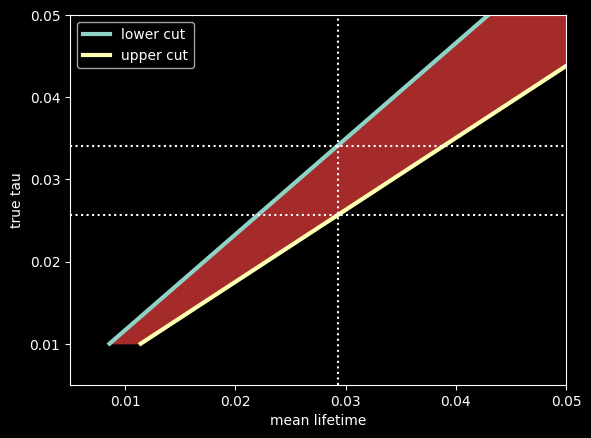

rigorous 68% confidence interval: [ 0.0257 , 0.0341 ]


In [6]:
taus = np.arange(0.01,0.08,0.001)

tau_hat = np.mean(sim_times)
n = len(sim_times)

lower_cut = []
upper_cut = []

for tau in taus:
    # lowest observed value that passes hypothesis test
    lower_cut.append(tau-tau/np.sqrt(n))
    # highest observed value that passes hypothesis test
    upper_cut.append(tau+tau/np.sqrt(n))


# derive the intersection points, which define the confidence interval end points
tau_lower = tau_hat/(1+1/np.sqrt(n))
tau_upper = tau_hat/(1-1/np.sqrt(n))

plt.plot(lower_cut,taus,label='lower cut',lw=3)
plt.plot(upper_cut,taus,label='upper cut',lw=3)
plt.fill_betweenx(taus,lower_cut,upper_cut,color='brown')
plt.axvline(x=tau_hat,ls=':')
plt.axhline(y=tau_lower,ls=':')
plt.axhline(y=tau_upper,ls=':')
plt.ylabel('true tau')
plt.xlabel('mean lifetime')
plt.legend()
plt.xlim(0.005,0.05)
plt.ylim(0.005,0.05)
plt.show()

print('rigorous 68% confidence interval: [',round(tau_lower,4),',',round(tau_upper,4),']')

In [ ]:
# Run the analysis with much less data - do the intervals agree?